Playground
==

You can test the model here

In [ ]:
# build & run test
!./scripts/build_n_test.sh

In [1]:
# Before playing, make sure you already build the project
import dummyml
import numpy as np
import cv2
from matplotlib import pyplot as plt

Naive Bayes Classifier
---

In [3]:
dummyX = np.zeros((4,))
nb_classifier = dummyml.naive_bayes_classifier(1,1)

nb_classifier.load('model/myIRIS.dmy')
print("Result:",nb_classifier(dummyX))

Result: [4.27880778e-82 2.10843320e-01 7.89156680e-01]


K Means Clustering
---

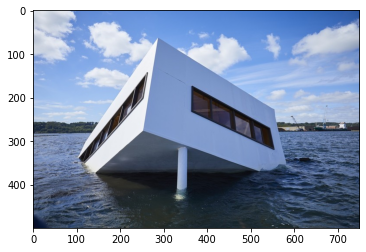

In [4]:
img = cv2.cvtColor(cv2.imread('./model/building.jpg'), cv2.COLOR_BGR2RGB)
lenna = np.array(img, dtype=np.float64)/256
plt.imshow(img)
plt.show()

Iter #0....
Iter #1....
Iter #2....
Iter #3....
Iter #4....
Iter #5....
Iter #6....
Iter #7....
Iter #8....
Iter #9....
Iter #10....
Iter #11....
Iter #12....
Iter #13....
Iter #14....
Iter #15....
Iter #16....
Iter #17....
Iter #18....
Iter #19....
pool # 0 , min Inertia =  18067.226993585064
Final means:
 [[0.58339236 0.68028983 0.84691802]
 [0.18548701 0.2310064  0.30032627]]


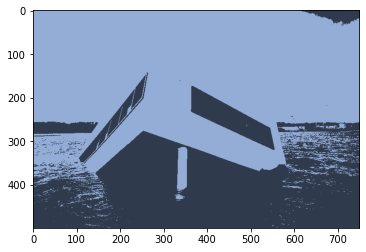

In [5]:
dataset_size = lenna.shape[0]*lenna.shape[1]
lennaX = lenna.flatten().reshape((dataset_size,3))
k = 2
pool = 30
clusters = [np.random.randint(0, k, size=dataset_size, dtype=np.int32) for p in range(pool)]
kms_pool = [dummyml.k_means(3,k) for i in range(pool)]

for iter in range(20):
    print(f"Iter #{iter}....")
    for p in range(pool):
        kms_pool[p].fit(lennaX, clusters[p])

inertias = [kms_pool[p].inertia for p in range(pool)]
min_index = np.argmin(inertias)
print("pool #",min_index,", min Inertia = ",inertias[min_index])

means = kms_pool[min_index].means()
print("Final means:\n",means)
flat = np.array([means[np.int8(cluster)] for cluster in clusters[min_index]]).flatten()
new_img = flat.reshape(lenna.shape[0],lenna.shape[1],3)
plt.imshow(new_img)
plt.show()


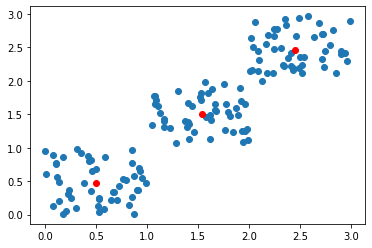

In [6]:
data_points = np.random.random((150,2))
data_points[:50,:] += 2
data_points[50:100,:] += 1
clstr = np.random.randint(0, 3, size=150, dtype=np.int32)
kms = dummyml.k_means(2, 3)

for iter in range(20):
    kms.fit(data_points, clstr)

means = kms.means()

plt.scatter(data_points[:,0], data_points[:,1])
plt.scatter(means[:,0], means[:,1], color='red')
plt.show()

In [ ]:
kms_pool[min_index].save("model/kms_building_best.dmy")

In [ ]:
loaded_kms = dummyml.k_means("model/kms_building_best.dmy")
print(loaded_kms.means())

Gaussian Process
---

In [ ]:
def f(x):
    return 2 + x*0.5 - x**2 + x**3*0.2 + np.random.randn(len(x))*3
x = np.linspace(-5, 5, 30)
y = f(x)

In [ ]:
gp = dummyml.gaussian_process(
    x.reshape((x.size,1)),
    y
)

In [ ]:
gp = dummyml.gaussian_process(
    x.reshape((x.size,1)),
    y,
    0.2,
    dummyml.kernel.RadialBasisFunctionKernel
)

In [ ]:
plt.scatter(x,y)

gp_x = np.linspace(-5, 5, 300)
pred = [gp(_x) for _x in gp_x.reshape(300,1)]
gp_y = np.array([mv[0] for mv in pred])
conf95 = np.array([mv[1]**0.5 * 2 for mv in pred])
plt.plot(gp_x, gp_y)
plt.fill_between(gp_x, gp_y + conf95, gp_y - conf95, alpha = 0.2)


plt.show()

Kernel K Means
---

In [2]:
img = cv2.cvtColor(cv2.imread('./model/island.png'), cv2.COLOR_BGR2RGB)
island = np.array(img, dtype=np.float64)/256
dataset_size = island.shape[0]*island.shape[1]
island_x = island.flatten().reshape((dataset_size,3))

In [4]:
K = 6
termination_cond = 1.0

In [ ]:
kkms = dummyml.kernel_k_means(K, island_x, dummyml.kernel.RadialBasisFunctionKernel)
y = np.random.randint(0, K, size=dataset_size, dtype=np.int32)
pre_iner = np.inf
print("initial y is",y[:20])
while True:
    kkms.fit(y)
    iner = kkms.inertia
    print("Inertia is:", iner,", y is",y[:20])
    if abs(iner - pre_iner) < termination_cond:
        print("Convergence.")
        break
    pre_iner = iner

color_pool = np.random.randint(0,256, size=(K, 3))
new_island = np.array(
    [color_pool[k] for k in y[:dataset_size]],
    dtype=np.uint8
).reshape(island.shape[0], island.shape[1], 3)

plt.imshow(new_island)
plt.show()

In [ ]:
img = cv2.cvtColor(cv2.imread('./model/forest.jpg'), cv2.COLOR_BGR2RGB)
forest = np.array(img, dtype=np.float64)/256
dataset_size = forest.shape[0]*forest.shape[1]
forest_x = forest.flatten().reshape((dataset_size,3))

In [ ]:
kkms = dummyml.kernel_k_means(K, forest_x, dummyml.kernel.RadialBasisFunctionKernel)
y = np.random.randint(0, K, size=dataset_size, dtype=np.int32)
pre_iner = np.inf
while True:
    kkms.fit(y)
    iner = kkms.inertia
    print("Inertia is:", iner)
    if abs(iner - pre_iner) < termination_cond:
        print("Convergence.")
        break
    pre_iner = iner

color_pool = np.random.randint(0,256, size=(K, 3))
new_forest = np.array(
    [color_pool[k] for k in y],
    dtype=np.uint8
).reshape(forest.shape[0], forest.shape[1], 3)

plt.imshow(new_forest)
plt.show()